#  Human Voice

## Reference

In [109]:
# https://www.kaggle.com/datasets/alarmanovi/gender-recognition-by-voice-2023

## Impor Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gri
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import seaborn as sns



## Import Data

In [111]:
# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X01: Mean Frequency (mean_freq): Computed using Fast Fourier Transform (FFT). Represents the average frequency of the audio signal.
# X02: Standard Deviation of Frequency (sd_freq): Calculated using the standard deviation of the spectral centroid. Indicates the spread or variability of the spectral centroid.
# X03: Median Frequency (median_freq): Obtained from the median of the spectral centroid. Represents the middle value of the distribution of spectral centroid frequencies.
# X04: 25th Percentile Frequency (q25_freq): Quantiles of the spectral centroid. Provide information about the distribution of spectral centroid frequencies.
# X05: 75th Percentile Frequency (q75_freq): Quantiles of the spectral centroid. Provide information about the distribution of spectral centroid frequencies.
# X06: Interquartile Range of Frequency (iqr_freq): The range between the 25th and 75th percentiles. Measures the spread of the middle 50% of spectral centroid frequencies.
# X07: Skewness (skewness): Descriptive statistics of the spectral bandwidth. Indicate the shape of the spectral bandwidth distribution.
# X08: Kurtosis (kurtosis_val): Descriptive statistics of the spectral bandwidth. Indicate the shape of the spectral bandwidth distribution.
# X09: Spectral Flatness (spectral_flatness): Represents the flatness of the power spectrum. A measure of how noise-like or tonal the audio is.
# X10: tempogram: a mid-level representation of tempo information, is constructed to characterize tempo variation and local pulse in the audio signal.
# X11: Mode Frequency (mode_freq): Extracted from the tempogram. Represents the mode (most common) frequency in the audio signal.
# X12: Centroid Frequency (centroid_freq): The mean of the spectral centroid. Provides the center of mass of the spectral distribution.
# X13: Peak Frequency (peak_freq): The frequency with the highest amplitude in the spectral centroid. Indicates the dominant frequency in the audio signal.
# X14: mean_fun: Additional Features Related to Fundamental Frequency. Extracted from the root mean square (RMS) values. Provide information about the fundamental frequency.
# X15: min_fun: Additional Features Related to Fundamental Frequency. Extracted from the root mean square (RMS) values. Provide information about the fundamental frequency.
# X16: max_fun: Additional Features Related to Fundamental Frequency. Extracted from the root mean square (RMS) values. Provide information about the fundamental frequency.
# X17: mean_dom: Additional Features Related to Dominant Frequency. Derived from the tempogram. Offer insights into the dominant frequencies and their range.
# X18: min_dom: Additional Features Related to Dominant Frequency. Derived from the tempogram. Offer insights into the dominant frequencies and their range.
# X19: max_dom: Additional Features Related to Dominant Frequency. Derived from the tempogram. Offer insights into the dominant frequencies and their range.
# X20: dom_range: Additional Features Related to Dominant Frequency. Derived from the tempogram. Offer insights into the dominant frequencies and their range.
# X21: Modulation Index (mod_index): Calculated using the YIN algorithm. Indicates the degree of modulation in the audio signal.
#   y: Label (label): Assigned as 'female' or 'Male' for all processed audio files.


path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/male_female_voice.csv'
voice = pd.read_csv(path)
voice.shape

(5993, 22)

In [112]:
voice.isna().sum()

mean_freq            0
sd_freq              0
median_freq          0
q25_freq             0
q75_freq             0
iqr_freq             0
skewness             0
kurtosis_val         0
spectral_flatness    0
tempogram            0
mode_freq            0
centroid_freq        0
peak_freq            0
mean_fun             0
min_fun              0
max_fun              0
mean_dom             0
min_dom              0
max_dom              0
fund_freq            0
mod_index            0
label                0
dtype: int64

In [113]:
# change the columns name
name_feature = ['x' + str(i) for i in range(1, 22)]
name_feature = name_feature + ['y']
voice.columns = name_feature

In [114]:
# check data to see wheather it is balance
voice['y'].value_counts()

male      3682
female    2311
Name: y, dtype: int64

In [115]:
#  the data is not balanced, so need to upsample
n_max = voice.y.value_counts().max()
# calculate how many data have to resample
need_sample = n_max - voice.y.value_counts()
# resample for each labels(female)
cond = voice.y == 'female'
from_sample = voice[cond]
sample_needed = resample(from_sample, replace = True, n_samples = need_sample[1])
# add these sample_needed to the original data 
voice = pd.concat([sample_needed, voice], axis = 0, ignore_index = True)

In [116]:
# check whether the data is balance
voice.y.value_counts()

female    3682
male      3682
Name: y, dtype: int64

## Standard the data

In [117]:
voice1 = voice.copy()
# split the data into features and target
cond1 = voice1.columns == 'y'
allfeatures = voice1.columns[~cond1]

# standardize the data
st = StandardScaler()
voice1[allfeatures] = st.fit_transform(voice1[allfeatures])

In [118]:
# voice1 = voice.copy()
# split the data into features and target
# cond1 = voice1.columns == 'y'
# allfeatures = voice1.columns[~cond1]

# X =  voice1[allfeatures]
# y = voice1.y

# standardize the data
# st = StandardScaler()
# voice1_allfeature = pd.DataFrame(st.fit_transform(voice1_allfeature), columns = allfeatures)
# voice1_allfeature = pd.DataFrame(st.fit_transform(voice1_allfeature), columns = allfeatures)

# # voice1_allfeature['y'] = y
# # voice1 = pd.concat([voice1_allfeature, y], ignore_index = True) #  only works for joining rows, or only works for tables that have a column in common

# # voice1 = voice1_allfeature
# # voice1

## Visualize the data

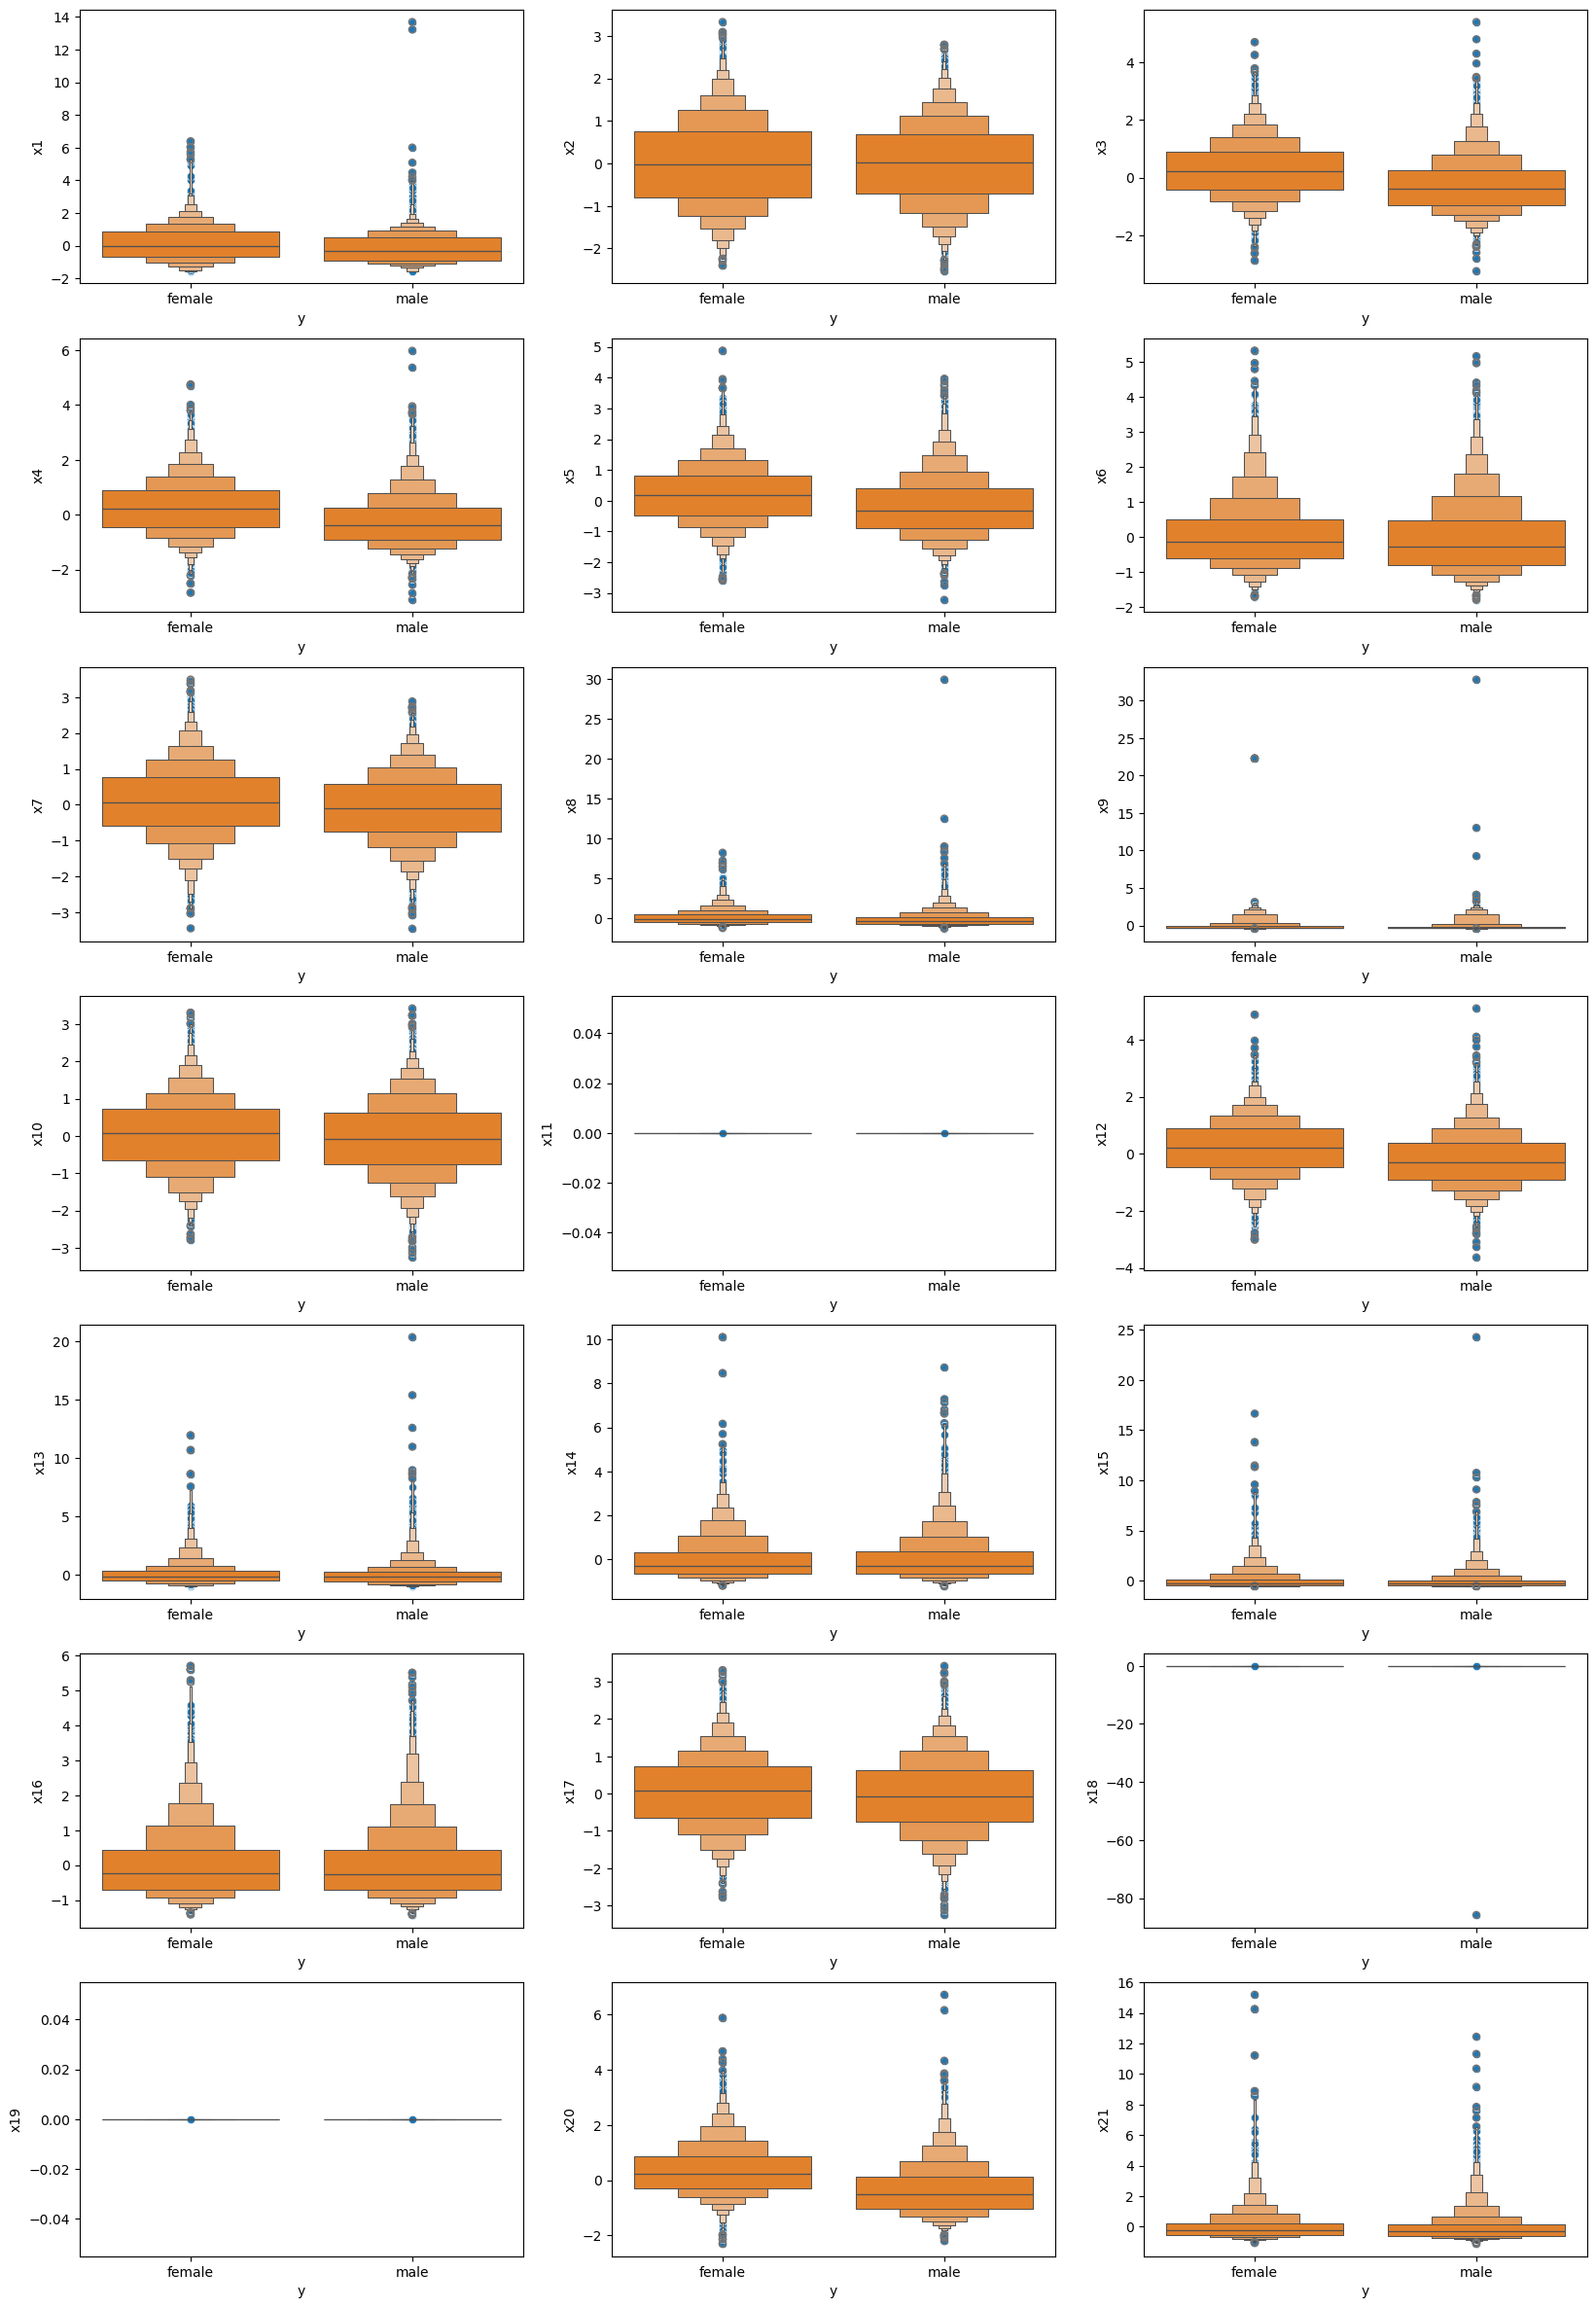

In [119]:
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize = (20, 30))
# plot each features vs labels
ax = np.ravel(ax)
for i in range(0,21):
  sns.scatterplot(ax = ax[i], data = voice1, y = voice1.columns[i], x = 'y' )
  sns.boxenplot(ax = ax[i], data = voice1, y = voice1.columns[i], x = 'y')
plt.show()

## Split the data into training and test

In [120]:
X_train, X_test, y_train, y_test = train_test_split(voice1[allfeatures], voice1['y'],train_size = 0.7)

## Features Selection

In [121]:
# apply randomfrest to select the feature
rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini')
rf.fit(X_train, y_train)
feature_import = pd.DataFrame({'features': rf.feature_names_in_,'feature score': rf.feature_importances_}).sort_values(by = 'feature score', ascending = False).reset_index()
feature_import = feature_import[0:10]
# get the important feature names
important_feature_name = feature_import.features.values
important_feature_name

array(['x20', 'x7', 'x8', 'x1', 'x3', 'x4', 'x2', 'x21', 'x12', 'x6'],
      dtype=object)

## Use the new Data

In [122]:
X1_train = X_train[important_feature_name]
X1_test = X_test[important_feature_name]

## Naive Bayes

In [123]:
nb = GaussianNB()
nb.fit(X1_train, y_train)

GaussianNB()

In [124]:
y_pred = nb.predict(X1_test)

## Confusion Matrix

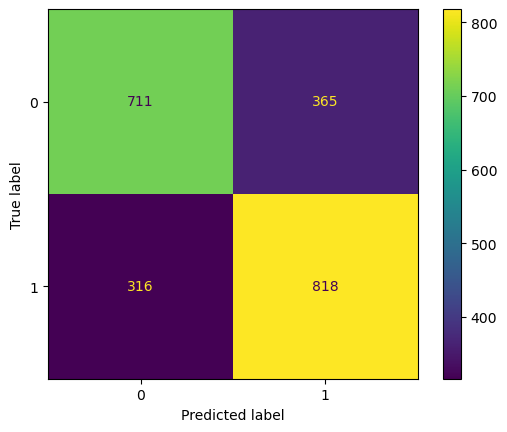

In [125]:
cm = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

## Results

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      female       0.69      0.66      0.68      1076
        male       0.69      0.72      0.71      1134

    accuracy                           0.69      2210
   macro avg       0.69      0.69      0.69      2210
weighted avg       0.69      0.69      0.69      2210



In [127]:
X1_test.

SyntaxError: invalid syntax (2494674260.py, line 1)

## Decision Region

In [128]:
y_train

455     female
5953    female
7023    female
5951    female
17      female
         ...  
5348    female
2850      male
1653      male
711     female
3556      male
Name: y, Length: 5154, dtype: object

In [129]:
y_test

6393    female
2424      male
1966      male
6091    female
7032    female
         ...  
2582      male
785     female
3208      male
80      female
5288    female
Name: y, Length: 2210, dtype: object

In [136]:
X2_test = X1_test.iloc[:,[0,1]]
X2_test = np.ravel(X2_test)
labels = {
  'female' : 0,
  'male' : 1
}

y_test = np.ravel(y_test)
# plot_decision_regions(X = X2_test, y = y_test, clf =nb, legend = 2)


SyntaxError: invalid syntax (709236768.py, line 7)